In [1]:
%%capture install
try:
  import imlms
  print('Already installed')
except:
  %pip install git+https://github.com/Mads-PeterVC/imlms

In [2]:
print(install.stdout.splitlines()[-1])

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Object Oriented Programming

In Python everything is an an instance some class of "objects", for example
an integer is an instance of the `int` type, as we may check using the `type` function

In [4]:
type(1)

int

So far we have mostly used built-in types or types from libraries e.g. Numpys `array`.
However, it is often useful to understand how to make our own types.

This is done by creating a class using the `class` statement. You can think of
a class definition as a blueprint for instances of the class.

In [5]:
class FoodItem:

    def __init__(self, name, price_pr_unit):
        """
        The constructor of the class FoodItem, this __init__ method is
        called when a new object of the class is created.
        """
        self.name = name
        self.price_pr_unit = price_pr_unit

    def __str__(self):
        """
        This method is called when the object is printed, for example by the print() function.
        """
        return f"{self.name}: ${self.price_pr_unit}"

We can then create instances of our class,

In [8]:
tamal = FoodItem("Tamal", 25)
burrito = FoodItem("Burrito", 15)

print(tamal)
print(burrito)

Tamal: $25
Burrito: $15


However, the power of classes come when using inheritance.

With inheritance we can make classes that inherit functionality from the parent
class and possibly with new added functionality.

For example, we may inherit from `FoodItem` to create a `Tamal` class and a `Burrito` class
that each have slightly different logic.

In [9]:
class Tamal(FoodItem):

    def __init__(self, tamal_type):
        super().__init__("Tamal", 25)
        if tamal_type in ["elote", "carne con chile"]:
            self.tamal_type = tamal_type
        else:
            raise ValueError(f"Invalid tamal type: {tamal_type}")

class Burrito(FoodItem):

    def __init__(self, burrito_type):
        if burrito_type in ["machaca", "carne asada", "frijol"]:
            self.burrito_type = burrito_type
        else:
            raise ValueError(f"Invalid burrito type: {burrito_type}")

        if burrito_type == "machaca":
            price = 20
        elif burrito_type == "carne asada":
            price = 30
        elif burrito_type == "frijol":
            price = 15
        super().__init__("Burrito", price)


Classes have attributes, e.g. for the `FoodItem`-class the price is an attribute.
We can access attributes for instances of the class with `.`-notation

In [10]:
carne_tamal = Tamal("carne con chile")
print(carne_tamal.price_pr_unit)

machaca_burrito = Burrito("machaca")
print(machaca_burrito.price_pr_unit)

25
20


Classes lets us write code where we are sure that some attribute exists, e.g.
we can now write a `price_calculator`-function that calculates the total price
of a list of `FoodItem`-instances

In [11]:
def price_calculator(food_items):
    total_price = 0
    for food_item in food_items:
        total_price += food_item.price_pr_unit
    return total_price

food_items = [carne_tamal, machaca_burrito]
total_price = price_calculator(food_items)
print(total_price)

45


If we make a new class that inherits from `FoodItem` this continues to work

In [12]:
class Chilaquiles(FoodItem):

    def __init__(self, chilaquiles_type, spice_level):
        if chilaquiles_type in ["verdes", "rojos", "mole"]:
            self.chilaquiles_type = chilaquiles_type
        else:
            raise ValueError(f"Invalid chilaquiles type: {chilaquiles_type}")

        if spice_level in ["mild", "medium", "hot"]:
            self.spice_level = spice_level

        super().__init__("Chilaquiles", 50)

In [13]:
food_items = [carne_tamal, machaca_burrito]
food_items.append(Chilaquiles("verdes", "hot"))
total_price = price_calculator(food_items)
print(total_price)

95


### Exercise: A Triangle Class

Create a `Triangle`-class with the following attribute:

- positions: An (3x2)-np.array of the positions
- color: A string for the color of the triangle

Additionally, the class should have the following methods

- `__init__`: Initialization method
- `plot`: Plot the triangle in a given `ax`.
- `move`: Move the triangle by the given `delta` which is also an np.array
- `rotate`: Rotate the triangle given an `angle` in [0, 2 $\pi$].
- `change_color` Change the color of the triangle.

Hint: For the rotation method you should create a rotation matrix and calculate new positions as the dot product
between that matrix and the positions attribute. You can use `np.cos`, `np.sin` and `np.dot` - note that the trigonometric functions use radians.

In [14]:

class Triangle:

    def __init__(self, positions, color='red'):
        self.positions = np.array(positions)
        self.color = color

    def plot(self, ax):
        ax.fill(self.positions[:, 0], self.positions[:, 1], color=self.color)

    def move(self, delta):
        self.positions += delta

    def rotate(self, angle):
        matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        self.positions = np.dot(self.positions, matrix)

    def change_color(self, new_color):
        self.color = new_color

Try your class and each method

(-0.2, 4.2, -1.25, 4.25)

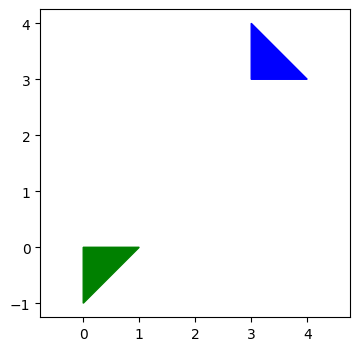

In [15]:
triangle = Triangle([[0, 0], [1, 0], [0, 1]], color='green')
triangle_1 = Triangle([[3, 3], [3, 4], [4, 3]], color='blue')

triangle.rotate(np.pi/2)

fig, ax = plt.subplots(figsize=(4, 4))

triangle.plot(ax)
triangle_1.plot(ax)

ax.axis('equal')

### Exercise: Projectile Motion

Create a `Projectile`-class with the following attributes

- `launch_velocity`: A `float` representing the velocity in m/s.
- `launch_angle`: A `float` for the angle in degrees.
- `position`: `tuple` of `float` for the position in 2D `(x, y)`.
- `time`: A `float` for the elapsed time since launch.

Additionally the class should have two methods

- `__init__`: The constructor that creates an instance of the class.
- `update_position`: Update the positions given a timestep `dt`.
- `is_in_air`: Check whether the projectile is still in the air returning a `bool`.

The update should follow the kinematics of motion, where horizontal and vertical motion is given by

$$
x = v_x t
$$

$$
y = v_y t - \frac{1}{2}g t^2
$$
And the velocity components depend on the launch angle $\theta$

$$
v_x = v \cos(\theta)
$$
$$
v_y = v \sin(\theta)
$$

Your `update_position` method should thus take small time step `dt`
and increase the total time `self.time` and then calculate the positions
for that time.

To check whether the projectile still is in the air, check that $y > 0$.

In [ ]:
from math import sin, cos

class Projectile:

    def __init__(self, launch_velocity, launch_angle):
        self.launch_velocity = launch_velocity
        self.launch_angle = launch_angle
        self.position = (0.0, 0.0)
        self.time = 0.0

    def update_position(self, dt):
        g = 9.8  # Acceleration due to gravity (m/s^2)
        vx = self.launch_velocity * cos(self.launch_angle)
        vy = self.launch_velocity * sin(self.launch_angle)

        self.time += dt
        x = vx * self.time
        y = vy * self.time - 0.5 * g * self.time**2
        self.position = (x, y)  # Ensure y >= 0 (ground level)

    def is_in_air(self):
        return self.position[1] >= 0

In [ ]:
projectile = Projectile(10, 45)

# Simulate its motion
dt = 0.1  # Time step
while projectile.is_in_air():
    projectile.update_position(dt)
    print(f"Time: {projectile.time:.1f}s, Position: {projectile.position}")

Time: 0.1s, Position: (0.5253219888177297, 0.8019035245341185)
Time: 0.2s, Position: (1.0506439776354595, 1.505807049068237)
Time: 0.3s, Position: (1.5759659664531895, 2.1117105736023554)
Time: 0.4s, Position: (2.101287955270919, 2.619614098136474)
Time: 0.5s, Position: (2.626609944088649, 3.029517622670592)
Time: 0.6s, Position: (3.1519319329063786, 3.34142114720471)
Time: 0.7s, Position: (3.677253921724108, 3.5553246717388287)
Time: 0.8s, Position: (4.202575910541838, 3.671228196272948)
Time: 0.9s, Position: (4.727897899359568, 3.689131720807066)
Time: 1.0s, Position: (5.253219888177297, 3.6090352453411834)
Time: 1.1s, Position: (5.7785418769950265, 3.4309387698753033)
Time: 1.2s, Position: (6.303863865812757, 3.1548422944094208)
Time: 1.3s, Position: (6.829185854630487, 2.78074581894354)
Time: 1.4s, Position: (7.354507843448217, 2.308649343477656)
Time: 1.5s, Position: (7.879829832265948, 1.7385528680117766)
Time: 1.6s, Position: (8.405151821083678, 1.0704563925458928)
Time: 1.7s, P

We can then track the projectiles motion and plot the trajectory

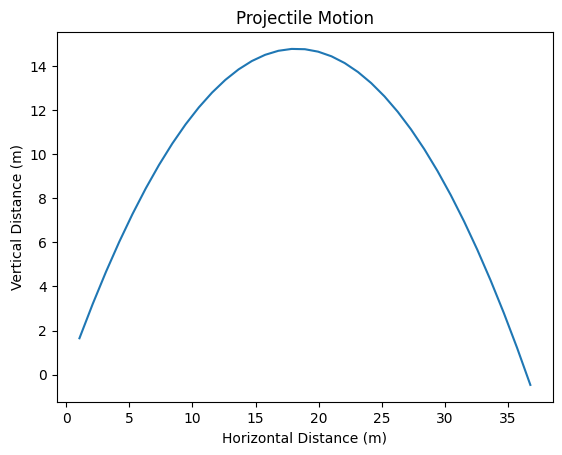

In [ ]:
import matplotlib.pyplot as plt

# Initialize projectile and empty lists for positions
projectile = Projectile(20, 45)
x_vals, y_vals = [], []

# Simulate motion
dt = 0.1
while projectile.is_in_air():
    projectile.update_position(dt)
    x_vals.append(projectile.position[0])
    y_vals.append(projectile.position[1])

# Plot trajectory
plt.plot(x_vals, y_vals)
plt.title("Projectile Motion")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.show()


### Exercise: Elastic Collisions

Create a `Particle` class and a `System`-class for the simulation of elastic collisions.

The particle class should contain the following attributes

- `mass`: The mass of the particle, a float
- `position`: A 2d array of the position of the particle
- `velocity`: A 2d array of the velocity of the particle
- `radius`: The radius of the particle, float.

The particle class should also have these methods

- `move`: Takes a timestep `dt` and moves the particle according to its velocity.
- `check_collision`: Check whether the particle has collided with another particle by being closer than the sum of their radii. Takes another particle as input.
- `plot`: Draw the particle in a given axis.
- `calculate_kinetic_energy`: Returns the kinetic energy of the particle

In [ ]:
class Particle:

    def __init__(self, mass, position, velocity, radius=1.0):
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.radius = radius

    def move(self, dt):
        self.position += self.velocity * dt

    def check_collision(self, other_particle):
        distance = np.linalg.norm(self.position - other_particle.position)
        return distance < self.radius + other_particle.radius

    def plot(self, ax):
        circle = plt.Circle(self.position, self.radius, color='b', fill=False)
        ax.add_artist(circle)
        ax.draw_artist(circle)

The `System` class has attributes

- `particles` A list of `Particle` instances

And methods

- `add_particle`: Add a particle to the list of particles by appending it to the `particles` list.
- `evovle`: Takes a timestep `dt` and evolves the system according to the velocities of the particles. Should also check for collisions and update the particles velocities according to the equations of an elastic collisions.

The important equations can be found on [Wikipedia](https://en.wikipedia.org/wiki/Elastic_collision#Two-dimensional_collision_with_two_moving_objects)

In [ ]:
class System:

    def __init__(self):
        self.particles = []

    def add_particle(self, particle):
        self.particles.append(particle)

    def evolve(self, dt):
        for i, particle in enumerate(self.particles):
            particle.move(dt)
            for j, other_particle in enumerate(self.particles):
                if i > j:
                    if particle.check_collision(other_particle):
                        particle.collide(other_particle)

Test your code by creating to particles that are on a collision trajectory, check that the kinetic energy is conserved
(e.g. plot the kinetic energy as function of time).

After that you can create a system with more particles. You can also try creating an animation of the system using
[matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html).